In [45]:
%autosave 10

Autosaving every 10 seconds


In [46]:
from tensorflow.python.client import device_lib

In [47]:
 device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 17011329851864294943, name: "/device:XLA_GPU:0"
 device_type: "XLA_GPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 11639058175846619463
 physical_device_desc: "device: XLA_GPU device", name: "/device:XLA_CPU:0"
 device_type: "XLA_CPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 16645746289554666691
 physical_device_desc: "device: XLA_CPU device", name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 1322516480
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 5373990733462713863
 physical_device_desc: "device: 0, name: GeForce GTX 1050, pci bus id: 0000:01:00.0, compute capability: 6.1"]

In [160]:
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense
from numpy import genfromtxt
from keras.applications.vgg19 import VGG19
from keras.applications.vgg16 import VGG16

from keras.layers import Input, Flatten, Dense
from keras.models import Model
import sys
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import tensorflow as tf
# import matplotlib.pyplot as plt
# import matplotlib as mpl



from keras.models import Sequential
from keras.layers.core import Flatten, Dense, Dropout
from keras.layers.convolutional import Convolution2D, MaxPooling2D, ZeroPadding2D
from keras.optimizers import SGD
import  numpy as np
def escape():
    sys.exit()

    
    

import pandas as pd
import numpy as np


from sklearn import decomposition
from sklearn.metrics import accuracy_score, roc_auc_score,recall_score
from sklearn.metrics import precision_score
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score,  GridSearchCV
from sklearn.manifold import TSNE
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, RobustScaler  
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix,classification_report

# стороняя библиотека для работы с несбалансированными датасетами
from imblearn.over_sampling import SMOTE, ADASYN

# настройки отображения графиков
# %config InlineBackend.figure_format = 'svg' 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="ticks", color_codes=True)
%matplotlib inline

# увеличим  размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 9,5


import itertools

In [161]:
path = '../data/MachineLearningCSV/MachineLearningCVE/Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv'

In [191]:
df = pd.read_csv(path, dtype={' Flow Packets/s': object,' Flow Bytes/s' : object})
new_cols=[]
for c in df.columns:
    new_cols.append(c.strip())
    
df.columns = new_cols

/home/ilyua/.local/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [192]:
# df = df.sample(n=200000)

In [193]:
# df = df.groupby('Label').apply(lambda x: x.sample(frac=0.4))

In [194]:

df.columns
df = df.replace(to_replace='Infinity',value=  3.000000e+06)
df = df.dropna()

In [195]:
df['Label'].value_counts(0)

BENIGN          288548
Infiltration        36
Name: Label, dtype: int64

In [196]:
df['Flow Packets/s'] = pd.to_numeric(df['Flow Packets/s'])

In [197]:
df['Flow Bytes/s'] = pd.to_numeric(df['Flow Bytes/s'])

In [198]:
def plot_confusion_matrix(cm, classes=[0,1],title='Confusion matrix',cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=14)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [199]:
def create_balanced_data_adasyn(x,y):
    sm = ADASYN(random_state=12, ratio = 'minority')
    X,Y = sm.fit_sample(x, y)
    X = pd.DataFrame(X,columns =df.columns[:78] )
    Y = pd.DataFrame(Y,columns = ['Label'])
    return X,Y

In [200]:
def create_balanced_data_smote(x,y):
    sm = SMOTE(random_state=12, ratio = 'minority')
    X,Y = sm.fit_sample(x, y)
    X = pd.DataFrame(X,columns =df.columns[:78] )
    Y = pd.DataFrame(Y,columns = ['Label'])
    return X,Y

In [201]:
def estimate_model(clf, X_original_b,y_original_b,  X_test, y_test):

    print("ROC AUC score: "+ str(roc_auc_score(y_test,clf.predict_proba(X_test)[:,1])))
    print(classification_report(y_test,clf.predict(X_test)))

In [202]:
df['Label'] = preprocessing.LabelEncoder().fit_transform(df['Label'])


In [210]:
X_train,X_test,y_train,y_test = train_test_split(df.drop(['Label'],axis=1),df['Label'],test_size=0.5)

In [211]:
skf = StratifiedKFold(n_splits=2, shuffle=True)

In [212]:
# print(classification_report(y_test,clf.predict(X_test)))

X_train_s,y_train_s = create_balanced_data_smote(X_train, y_train)

In [213]:
len(df.columns)

79

In [214]:

y_train_s['Label'].value_counts()

1    144273
0    144273
Name: Label, dtype: int64

In [215]:
X_train_s.memory_usage(index=True).sum()

180052784

In [221]:
y_train.value_counts()

0    144273
1        19
Name: Label, dtype: int64

In [216]:
y_test.value_counts()

0    144275
1        17
Name: Label, dtype: int64

In [222]:
%%time
parameters_rfc = {"max_depth": [5,10,20],
              "n_estimators":[10,20,30],
              "max_features": [5,7]}

rfc = RandomForestClassifier(class_weight={1:13/79982})

gcv = GridSearchCV(rfc, parameters_rfc, n_jobs=-1, cv=skf, verbose=1,scoring='recall')


gcv.fit(X_train_as,y_train)
  


Fitting 2 folds for each of 18 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


CPU times: user 445 ms, sys: 284 ms, total: 729 ms
Wall time: 6.54 s


[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:    6.3s finished


{'max_depth': 5, 'max_features': 5, 'n_estimators': 10} 0.0


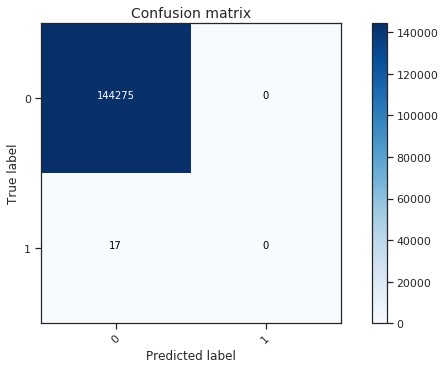

In [223]:

print(gcv.best_params_ , gcv.best_score_)

# estimate_model(gcv.best_estimator_ , X_original_b,y_original_b, X_test, y_test)

plot_confusion_matrix(confusion_matrix(y_test,gcv.best_estimator_.predict(X_test)))
   

In [19]:
# # model = Sequential()
# # model.add(Dense(79,  activation='relu'))
# # model.add(Dense(79,  activation='relu'))
# # model.add(Dense(512,  activation='relu'))
# # model.add(Dense(79,  activation='relu'))
# # model.add(Dense(1, activation='sigmoid'))

# def VGG_19(weights_path=None):
#     model = Sequential()
#     model.add(Dense(79,  activation='relu'))
   
#     model.add(Dropout(0.5))
#     model.add(Dense(4096, activation='relu'))
#     model.add(Dropout(0.5))
#     model.add(Dense(1000, activation='softmax'))
#     model.add(Dense(1, activation='sigmoid', name='predictions'))


#     if weights_path:
#         model.load_weights(weights_path)

#     return model
# model  = VGG_19()


In [20]:
# model_vgg19_conv = VGG19(include_top=False, weights='imagenet', input_shape=(img_col, img_row, 3))

In [21]:
# model.compile(loss=keras.losses.binary_crossentropy,
#               optimizer=keras.optimizers.RMSprop(),
#               metrics=[keras.metrics.categorical_accuracy,'accuracy'])

# batch_size = 32
# epochs = 3

In [22]:
# hist = model.fit(tr, y_train.values,
#           batch_size=batch_size,
#           epochs=epochs,
#           verbose=1,
#           validation_split=0.3)
# score = model.evaluate(X_test.values, y_test.values, verbose=0)

In [23]:
# training_loss= hist.history['loss']
# val_loss= hist.history['val_loss'] 
# training_acc= hist.history['acc'] 
# val_acc= hist.history['val_acc']
# xc=range(epochs)

# plt.figure(1,figsize=(7,5)) 
# plt.plot(xc,training_loss)
# plt.plot(xc,val_loss) 
# plt.xlabel('No. of Epochs') 
# plt.ylabel('loss') 
# plt.title('Training Loss vs Validation Loss') 
# plt.grid(True) 
# plt.legend(['Train','Val'])

# plt.figure(2,figsize=(7,5)) 
# plt.plot(xc,training_acc) 
# plt.plot(xc,val_acc) 
# plt.xlabel('No. of Epochs') 
# plt.ylabel('Accuracy') 
# plt.title('Training Accuracy vs Validation Accuracy') 
# plt.grid(True) 
# plt.legend(['Train','Val'],loc=4)

In [24]:
# checking_occurences = [x for x in y_test if x == 1]
# print("total length = ",len(y_test))
# print("Anomolies = ",len(checking_occurences))
# print("Normal = ", (len(y_test) - len(checking_occurences)))

# n = len(y_test) - len(checking_occurences)
# a = len(checking_occurences)

# label = ['Normal', 'Anomaly']
# samples = [n, a]

# default_dpi = mpl.rcParamsDefault['figure.dpi']
# mpl.rcParams['figure.dpi'] = default_dpi * 1.5

# # this is for plotting purpose
# index = np.arange(len(label))
# plt.bar(index, samples)
# plt.xlabel('Payload Types', fontsize=10)
# plt.ylabel('Samples', fontsize=10)
# plt.xticks(index, label, fontsize=10, rotation=0)
# plt.title('Samples identified by VGG19')
# plt.show()